In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras instead of keras directly
import matplotlib.pyplot as plt

Loading Model

In [6]:
Model = tf.keras.models.load_model('trained_Model.keras')  #It loads model saved by using model.save()

In [7]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

Visualize the test image

In [8]:
import cv2   #opencv

In [9]:
!pip install opencv-python

Visualize the single image of TEST 

In [31]:
image_path = "test/test/CornCommonRust1.JPG"

In [32]:
#Read image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #To convert BGR image to RGB

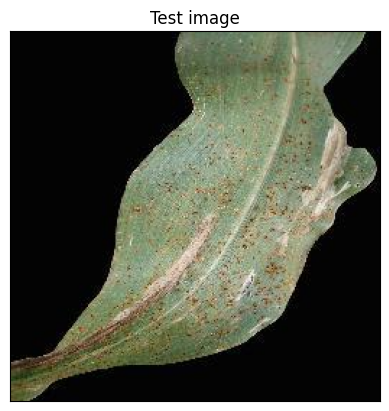

In [33]:
#Display image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [34]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #It is used to conver image in batch(we get batch no.also with dimension of image)
print(input_arr.shape)


(1, 128, 128, 3)


In [35]:
prediction = Model.predict(input_arr)
prediction   #it returns the Probabality of image to be in all 38 class
#prediction.shape  #it shows that we have one row and 38 coloums of category to which it may belongs

1/1 [==============================] - 0s 50ms/step


array([[1.88713073e-11, 9.78556629e-19, 1.05394209e-12, 8.15818018e-24,
        2.43199540e-11, 3.42124693e-19, 4.93165025e-13, 1.53488955e-09,
        1.00000000e+00, 3.44234255e-12, 1.85763883e-12, 1.89470616e-17,
        4.13197342e-14, 5.71552066e-18, 8.14734323e-20, 3.24683688e-22,
        7.23094138e-14, 1.99567590e-15, 4.39184567e-19, 1.14948524e-12,
        3.73884768e-18, 3.78513537e-22, 9.49341991e-15, 3.49085495e-19,
        1.83060929e-22, 4.37577510e-19, 3.73808731e-13, 5.90480399e-19,
        5.94724702e-15, 1.00550875e-14, 1.23476351e-09, 2.00699947e-21,
        7.72120214e-19, 3.31033769e-26, 6.17349541e-18, 1.42632950e-19,
        1.11213969e-21, 6.74641520e-16]], dtype=float32)

In [36]:
result_index = np.argmax(prediction)
result_index  #from this we get max probablity to which coloum it belongs

8

In [37]:
# get actual class name
class_names =['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy'] 


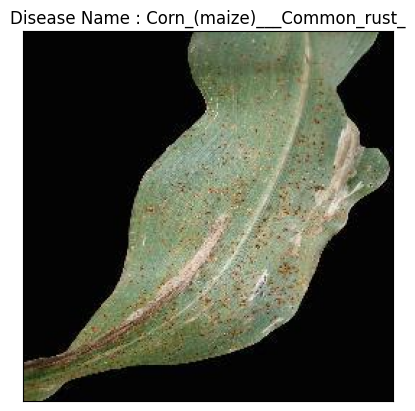

In [38]:
model_prediction =  class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name : {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [39]:
model_prediction

'Corn_(maize)___Common_rust_'